In [1]:
# 1. Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')   # Authorize when prompted

import pandas as pd
import os
import glob
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Search in your entire Google Drive (may take some time)
file_paths = glob.glob('/content/drive/MyDrive/sorted_df_var_*.csv', recursive=True)

# Extract just the filenames
file_names = [os.path.basename(path) for path in file_paths]

# Sort the filenames alphabetically
file_names.sort()

print(type(file_names))

# Print the sorted filenames
for name in file_names:
    print(name)

print(file_names[-1])

csv_path = '/content/drive/MyDrive/' + file_names[-1]

<class 'list'>
sorted_df_var_202506171543.csv
sorted_df_var_202506192121.csv
sorted_df_var_202506192139.csv
sorted_df_var_202506192139.csv


In [3]:
# Search in your entire Google Drive (may take some time)
lstm_file_paths = glob.glob('/content/drive/My Drive/LSTM_DOY/LSTM_results_DOY_grid_search/best_KGE/best_KGE_result_*.csv', recursive=True)

# Extract just the filenames
lstm_file_names = [os.path.basename(path) for path in lstm_file_paths]

# Sort the filenames alphabetically
lstm_file_names.sort()




# Print the sorted filenames
for name in lstm_file_names:
    print(name)

print(lstm_file_names[-1])




lstm_csv_path = '/content/drive/My Drive/LSTM_DOY/LSTM_results_DOY_grid_search/best_KGE/' + lstm_file_names[-1]

best_KGE_result_202506290309.csv
best_KGE_result_202506290309.csv


In [4]:
rf = pd.read_csv( csv_path )
print(rf)
# Print column data types
#print(rf.dtypes)

lstm = pd.read_csv( lstm_csv_path)
lstm['model_site'] = lstm['model_site'].astype('Int64')

print(lstm)

    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0            0  13310800           1103  0.315464 -0.217739  0.561662   
1            1  13192200            820  0.326945  0.144117  0.571791   
2            2  13311450           1098  0.357845 -0.174490  0.598202   
3            3  13311000           1101  0.386968 -0.117419  0.622068   
4            4  13154500           2088  0.410202 -0.041550  0.640470   
5            5  13092747           1377  0.484580 -0.071572  0.696118   
6            6  13211205            753  0.529429 -0.309338  0.727619   
7            7  13311250           1012  0.537925 -0.007768  0.733434   
8            8  13317660           1748  0.596277  0.045260  0.772190   
9            9  13310850           1042  0.712444 -0.500005  0.844064   
10          10  13296000            995  0.760408 -0.256101  0.872014   
11          11  13150430           1919  0.804744  0.175230  0.897075   
12          12  13307000            786  0.917044 -

In [5]:
rf = pd.read_csv( csv_path )
print(rf)
# Print column data types
#print(rf.dtypes)

lstm = pd.read_csv( lstm_csv_path)
lstm['model_site'] = lstm['model_site'].astype('Int64')

print(lstm)

    Unnamed: 0   site_no  number_of_obs       MSE      BIAS      RMSE  \
0            0  13310800           1103  0.315464 -0.217739  0.561662   
1            1  13192200            820  0.326945  0.144117  0.571791   
2            2  13311450           1098  0.357845 -0.174490  0.598202   
3            3  13311000           1101  0.386968 -0.117419  0.622068   
4            4  13154500           2088  0.410202 -0.041550  0.640470   
5            5  13092747           1377  0.484580 -0.071572  0.696118   
6            6  13211205            753  0.529429 -0.309338  0.727619   
7            7  13311250           1012  0.537925 -0.007768  0.733434   
8            8  13317660           1748  0.596277  0.045260  0.772190   
9            9  13310850           1042  0.712444 -0.500005  0.844064   
10          10  13296000            995  0.760408 -0.256101  0.872014   
11          11  13150430           1919  0.804744  0.175230  0.897075   
12          12  13307000            786  0.917044 -

In [6]:
merged_df = pd.merge( rf,  lstm, left_on='site_no', right_on='model_site', how='inner')
#merged_df['KGE_y'] = merged_df['KGE_y']#.astype('float64')

#merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[0] if isinstance(x, list) and len(x) == 1 else x)


merged_df['KGE_y'] = merged_df['KGE_y'].apply(lambda x: x[1:6])
merged_df['KGE_y'] = merged_df['KGE_y'].astype('float64')

merged_df = merged_df[ ['site_no', 'KGE_x', 'KGE_y'] ]

merged_df.columns=[ 'site_no', 'Random Forest', 'LSTM' ]

print(merged_df.dtypes)
print(merged_df)

site_no            int64
Random Forest    float64
LSTM             float64
dtype: object
     site_no  Random Forest   LSTM
0   13310800       0.926769  0.921
1   13192200       0.859797  0.863
2   13311450       0.907758  0.894
3   13311000       0.939221  0.912
4   13154500       0.729285  0.949
5   13092747       0.704597  0.896
6   13211205       0.889599  0.930
7   13311250       0.906752  0.966
8   13317660       0.915618  0.983
9   13310850       0.904339  0.939
10  13296000       0.875657  0.956
11  13150430       0.866316  0.903
12  13307000       0.909612  0.943
13  13341050       0.712652  0.829
14  13342500       0.752785  0.834
15  13190500       0.688853  0.518
16  13340600       0.943870  0.974
17  12305000       0.779612  0.881
18  13340000       0.945548  0.965
19  13176400       0.841286  0.927
20  12322000       0.673606  0.864
21  13213000       0.481536  0.235


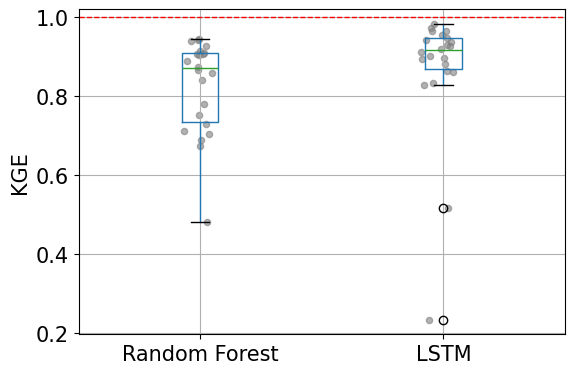

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['font.size'] = 15

fig, ax = plt.subplots(figsize=(6, 4))

merged_df[['Random Forest', 'LSTM']].boxplot(ax=ax)

for i, col in enumerate(['Random Forest', 'LSTM'], start=1):
    y = merged_df[col].values
    # Add small random x‑jitter around each box’s x‑position
    x = np.random.normal(i, 0.04, size=len(y))
    ax.scatter(x, y, s=20, color='grey', alpha=0.6)

# Add horizontal line at y=1
ax.axhline(y=1, color='red', linestyle='--', linewidth=1)

ax.set_ylabel( "KGE")
plt.tight_layout()

# Save the figure
plt.savefig("kge.png")  # Saves as a PNG file

plt.show()